# KaggleX Challenge Notebook

This notebook holds the code for the KaggleX Challenge. The challenge is to predict the price of used cars based on the given features. The dataset is taken from the Kaggle competition [here](https://www.kaggle.com/competitions/kagglex-cohort4/data).

What's done in this notebook:
- Vectorized features with get_dummies
- Split the data into training and testing data
- Trained a Random Forest Regressor and predicted the price of the test data
- Calculated the metrics and feature importance
- Dropped the least important features and retrained the model
- Predicted the price of the test data using the new model
- Calculated the metrics
- Retrained the model using the entire dataset and predicted the price of the test data

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# Load the data
df = pd.read_csv('../data/train.csv', index_col='id')
testSubmission = pd.read_csv('../data/test.csv', index_col='id')
sample_submission = pd.read_csv('../data/sample_submission.csv', index_col='id')

# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# Define features and target
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [6]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=6)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=6)

In [21]:
# Save model
from pickle import dump, load

# save
# with open('../models/KaggleX2.pkl','wb') as f:
#     dump(rf,f)

# load
with open('../models/KaggleX2.pkl', 'rb') as f:
    rf = load(f)


In [22]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

# Display results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print('Feature Importances:')
print(feature_importances)

Mean Absolute Error: 18444.131486872408
Mean Squared Error: 6698360808.820509
Root Mean Squared Error: 81843.51415243917
Feature Importances:
milage                                         0.232016
model_year                                     0.122807
ext_col_Gray                                   0.041036
transmission_Transmission w/Dual Shift Mode    0.039261
engine_3.0L V6 Cylinder Engine Diesel Fuel     0.034029
                                                 ...   
model_S-10 LS                                  0.000000
ext_col_Rosso                                  0.000000
engine_3.2L V6 18V MPFI SOHC                   0.000000
int_col_Oyster W/Contrast                      0.000000
model_Grand Cherokee L Overland                0.000000
Length: 3374, dtype: float64


In [23]:
# Select features with no importance
unimportant_features = feature_importances[feature_importances <= 0.000005].index
print('Unimportant Features: (' + str(len(unimportant_features)) + ')' )
print(unimportant_features)

Unimportant Features: (1965)
Index(['model_Taurus SHO',
       'engine_160.0HP 1.5L 4 Cylinder Engine Gasoline Fuel',
       'model_Model X Long Range', 'model_IS 350 Base',
       'engine_2.5L I4 16V GDI DOHC Turbo',
       'model_Silverado 1500 Limited High Country',
       'engine_132.0HP 1.8L 4 Cylinder Engine Gasoline Fuel',
       'engine_305.0HP 3.7L V6 Cylinder Engine Gasoline Fuel',
       'int_col_Sand Beige', 'model_Beetle 2.0T Final Edition SE',
       ...
       'model_Veyron 16.4 Grand Sport', 'ext_col_Selenite Gray Metallic',
       'engine_8.0L W16 64V GDI DOHC Twin Turbo', 'model_Mazda6 Grand Touring',
       'ext_col_Bianco Icarus Metallic', 'model_S-10 LS', 'ext_col_Rosso',
       'engine_3.2L V6 18V MPFI SOHC', 'int_col_Oyster W/Contrast',
       'model_Grand Cherokee L Overland'],
      dtype='object', length=1965)


In [24]:
# Drop unimportant features
df_important = df_encoded.drop(unimportant_features, axis=1)

# Define features and target
X = df_important.drop('price', axis=1)
y = df_important['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=6)

In [ ]:
# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=6)
rf.fit(X_train, y_train)

In [25]:
# Save model
# with open('../models/KaggleX2_imp.pkl','wb') as f:
#     dump(rf,f)

# Load model
with open('../models/KaggleX2_imp.pkl', 'rb') as f:
    rf = load(f)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [26]:
# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Display results
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 18595.60603417341
Mean Squared Error: 6677052958.586108
Root Mean Squared Error: 81713.23612846396


In [ ]:
# Initialize and train the Random Forest Regressor with all data
rf = RandomForestRegressor(n_estimators=100, random_state=6)
rf.fit(X, y)

In [27]:
# Save model
# with open('../models/KaggleX2_imp_all.pkl','wb') as f:
#     dump(rf,f)

# Load model
with open('../models/KaggleX2_imp_all.pkl', 'rb') as f:
    rf = load(f)

c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator DecisionTreeRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:347: InconsistentVersionWarning: Trying to unpickle estimator RandomForestRegressor from version 1.3.2 when using version 1.3.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


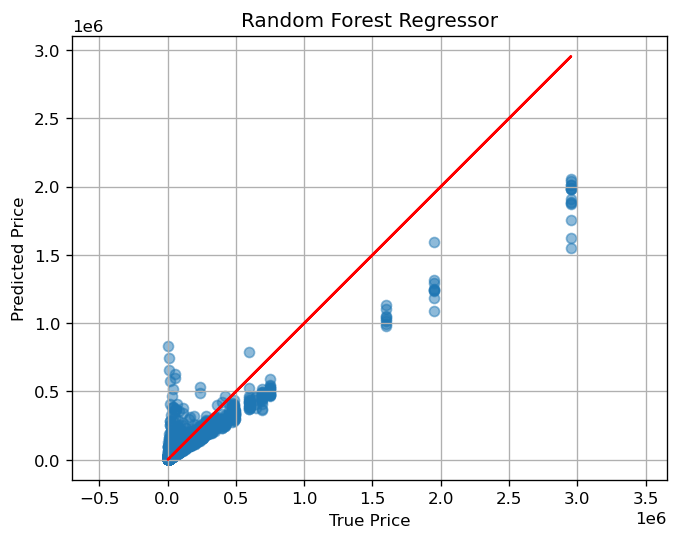

In [35]:
# Plot predictions on train data
plt.figure(dpi=120)
plt.scatter(y, rf.predict(X), alpha=0.5)
plt.plot(y,y,color='red')
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest Regressor')
plt.axis('equal')
plt.grid()
plt.show()

In [32]:
# Preprocess the test data
test_encoded = pd.get_dummies(testSubmission, drop_first=True)
unimportant_features_test = [unimportant_features for unimportant_features in unimportant_features if unimportant_features in test_encoded.columns]
test_important = test_encoded.drop(unimportant_features_test, axis=1)
features_not_in_train = [feature for feature in test_important.columns if feature not in X.columns]
test_predict = test_important.drop(features_not_in_train, axis=1)

# Check rf features and set them to test_predict if missing
features_not_in_test = [feature for feature in X.columns if feature not in test_predict.columns]
for feature in features_not_in_test:
    test_predict[feature] = 0

# Order features 
test_predict = test_predict[X.columns]

# Make predictions
predictions = rf.predict(test_predict)

# Create a submission file
submission = sample_submission.copy()
submission['price'] = predictions
submission.to_csv('../submissions/submission2.csv')

In [33]:
# Display the submission file
submission.head()

,price
id,
54273,22413.13
54274,20134.94
54275,32501.13
54276,68440.09
54277,31760.00
